- BPS : 주가수익배수
- PER : 주가수익비율
- PBR : 주가순자산비율
- EPS : 주당순이익
- DPS : 주당배당금

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_excel(
    "./data_kosdaq_20210401_per.xlsx", 
    engine='openpyxl', 
    index_col= 0, 
    usecols=[0,1,6,8]
)

In [ ]:
df.head()

In [ ]:
import numpy as np

In [ ]:
df.replace("-", np.nan, inplace=True)

In [ ]:
df.head()

In [ ]:
df2 = pd.read_excel(
    "./data_kosdaq_20210401_sise.xlsx", 
    engine="openpyxl", 
    index_col=0
)

In [ ]:
df2[["거래량"]]

In [ ]:
df2 = df.join(other=df2[["거래량"]])
df2.head()

In [ ]:
df_change = pd.read_excel(
    "./data_kosdaq_change_2021.xlsx", 
    engine = "openpyxl", 
    index_col=0, 
    usecols=[0,5]
)

In [ ]:
df_change.head(1)

In [ ]:
df3 = df2.join(other=df_change)
df3.head(1)

In [20]:
# 거래량이 0인 종목 -> 거래정지 된 목록 -> 제외
cond = df3["거래량"] != 0
df4 = df3.loc[cond]

In [ ]:
# PER을 기준으로 오름차순 정렬
df4.sort_values("PER", inplace=True)
df4.reset_index(inplace=True)
df4.head(10)

In [22]:
# 저 PER을 기준으로 하위 30개를 출력
low_per30 = df4.head(30)
low_per30["등락률"].mean()

14.45

In [23]:
# 20개씩 데이터의 그룹을 생성 
df4['group'] = pd.cut(df4.index, bins=20, labels=False)

C:\Users\moons\AppData\Local\Temp\ipykernel_6408\2449474840.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['group'] = pd.cut(df4.index, bins=20, labels=False)


In [27]:
df4['group'].value_counts()

0     70
4     70
14    70
9     70
19    70
5     69
6     69
7     69
8     69
3     69
1     69
11    69
12    69
13    69
2     69
15    69
16    69
17    69
18    69
10    69
Name: group, dtype: int64

In [29]:
df5 = df4.groupby('group')[['등락률']].mean()

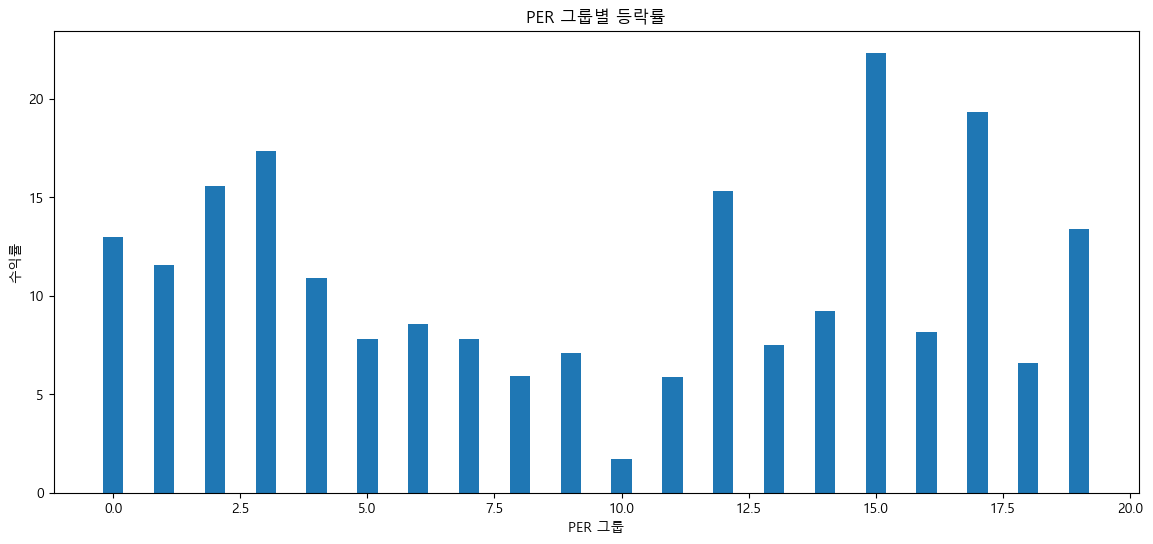

In [30]:
import matplotlib.pyplot as plt
import platform
if platform.system() == "Darwin":
    plt.rc("font", family="AppleGothic")
else:
    plt.rc("font", family='Malgun Gothic')

plt.figure(figsize=(14, 6))
plt.bar(df5.index, df5['등락률'], width=0.4)
plt.title("PER 그룹별 등락률")
plt.xlabel("PER 그룹")
plt.ylabel("수익률")
plt.show()